<a href="https://colab.research.google.com/github/kuberiitb/artificial_intelligence/blob/main/agent/WriterAgentLangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install langchain langchain_community langchain-openai langgraph --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 13.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [8]:
import os
from langchain.memory import ConversationBufferWindowMemory

In [9]:
from dotenv import load_dotenv
load_dotenv(".env")

True

In [10]:
from langchain.chat_models import ChatOpenAI

if not os.environ["OPENAI_API_KEY"]:
    os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)

from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-4o-mini", model_provider="openai")

/tmp/ipython-input-3350033213.py:6: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)


In [11]:
llm.invoke("Hi").content

'Hello! How can I assist you today?'

### Let's create a workflow(simpler form of Agent) to generate a Medium article and a promotional Linkedin post for a given topic.

In [12]:
from typing import Annotated
from typing_extensions import TypedDict

In [109]:
from langgraph.graph.message import add_messages
#Annotated[list, add_messages]

class State(TypedDict):
  topic: str
  medium_article: str
  linkedin_post: str

## Create Node for the Medium Article generation

In [110]:
from langchain_core.prompts import ChatPromptTemplate
medium_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", """You are a helpful assistant that writes articles for Medium on {topic} in 400-500 words .
                          Writing style considerations:
                          Vary punctuation naturally – don’t overuse em dashes. Prefer commas, colons, or short sentences when appropriate.

                          Avoid formulaic contrast – don’t always frame points as “Some say X, but actually Y.” Only use contrast when it genuinely adds depth.

                          Break list patterns – don’t always use three examples. Vary length and structure (2, 4, 5, or even just 1 strong example).

                          Balance tone – avoid relentless positivity. Present both benefits and drawbacks, adding nuance and skepticism where needed.

                          Use real sources – don’t drop generic quotes like “experts say” or unattributed sayings. If quoting, attribute it properly.

                          Vary sentence structure – mix short and long sentences. Avoid repeating the same rhythm or starting multiple sentences the same way.

                          Be concise – skip long, generic introductions. Get to the point quickly and avoid filler like “In today’s world…”

                          Stay factual – don’t invent statistics, names, or references. If unsure, phrase cautiously (e.g., “some studies suggest”) or omit.

                          Sound conversational but precise – write as if you’re explaining to a smart peer, not marketing to a crowd.

                          Make the article technical, easy to understand, using some analogy with everyday examples.
                          Start with an intution, discuss 3 main points and then summarize the article into one paragraph.
                          End with a call to action from users, like sharing the article with friends, follow the blog or like the article.
                          Also ask them to share their thougths in the comment."""),
            ("human", "{topic}"),
        ]
    )
medium_chain = medium_prompt | llm

def write_medium(state: State):
  response = medium_chain.invoke(
        {
            "topic": state["topic"],
        }
    )
  return {"medium_article": [response.content]}

In [111]:
topic = "Use of iterators in python"
article_text = medium_chain.invoke(topic).content

print(article_text)

Iterators in Python are a powerful tool that can help you manage and manipulate data in a memory-efficient way. If you've ever dealt with large datasets or wanted to loop over a collection of items without consuming much memory, iterators probably crossed your path. They allow you to traverse through the elements without needing to load everything into memory. Let’s dive into their utility, some key benefits, and potential drawbacks.

First, it’s essential to grasp what an iterator is in Python. At its core, an iterator is an object that implements two specific methods: `__iter__()` and `__next__()`. The former resets the iterator, while the latter fetches the next item. This behavior can be likened to a book where each page has a unique number: you can keep flipping through them one by one without needing to look at all the pages at once.

One of the biggest advantages of using iterators is memory efficiency. Iterators produce items one at a time and only when requested, rather than s

## Create Node for the LinkedIn post generation

In [112]:
from langchain_core.prompts import ChatPromptTemplate
linkedin_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", """You are a helpful assistant that writes for Linkedin on {topic} in 50-100 words on medium blog.
                        Linkedin post's objective is to channel linkedin audience to read the blog and increase blog's engagement.
                        Make the post easy to read and engaging.
                        Writing style considerations:
                        Vary punctuation naturally – don’t overuse em dashes. Prefer commas, colons, or short sentences when appropriate.

                        Avoid formulaic contrast – don’t always frame points as “Some say X, but actually Y.” Only use contrast when it genuinely adds depth.

                        Break list patterns – don’t always use three examples. Vary length and structure (2, 4, 5, or even just 1 strong example).

                        Balance tone – avoid relentless positivity. Present both benefits and drawbacks, adding nuance and skepticism where needed.

                        Use real sources – don’t drop generic quotes like “experts say” or unattributed sayings. If quoting, attribute it properly.

                        Vary sentence structure – mix short and long sentences. Avoid repeating the same rhythm or starting multiple sentences the same way.

                        Be concise – skip long, generic introductions. Get to the point quickly and avoid filler like “In today’s world…”

                        Stay factual – don’t invent statistics, names, or references. If unsure, phrase cautiously (e.g., “some studies suggest”) or omit.

                        Sound conversational but precise – write as if you’re explaining to a smart peer, not marketing to a crowd.

                        Blog's content is given here: {article}.\n\n
                        Make the message professional, start with a hook, add some points from the article and end with a call to action from users,
                        like read and share the medium article with friends."""),
            ("human", ["{topic}","{article}"]),
        ]
    )
linkedin_chain = linkedin_prompt | llm

def write_linkedin(state: State):
  response = linkedin_chain.invoke(
        {
            "topic": state["topic"],
            "article": state["medium_article"]
        }
    )
  return {"linkedin_post": [response.content]}


In [113]:
linkedin_chain.invoke({
            "topic":topic,
            "article": article_text
        }).content

"🚀 Ever wondered how to handle large datasets without sacrificing memory? Enter Python iterators. They're not just another feature; they are a game-changer! \n\nAt their core, iterators allow you to traverse data one item at a time. No more loading everything into memory. This can be invaluable for tasks like reading a file line by line or generating infinite sequences using the `itertools` module. However, remember, they have their downsides—once you've used an iterator, it’s a one-way street.\n\nCurious to explore more? Check out my latest blog post on the benefits and challenges of using Python iterators. If you find it valuable, please share it with your network! 💬 What are your experiences with Python iterators? Let’s discuss in the comments! \n\n🔗 [Read more on Medium]"

## Create the graph for workflow

In [114]:
from langgraph.graph import StateGraph, START, END

graph_builder = StateGraph(State)

graph_builder.add_node("write_medium", write_medium)
graph_builder.add_node("write_linkedin", write_linkedin)

graph_builder.add_edge(START, "write_medium")
graph_builder.add_edge("write_medium", "write_linkedin")
graph_builder.add_edge("write_linkedin", END)

graph = graph_builder.compile()

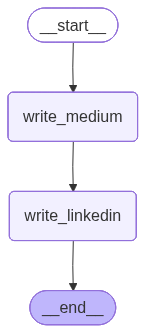

In [115]:
graph

## Try the workflow

In [116]:
workflow_output = graph.invoke({"topic": "iterables in python"})

In [117]:
workflow_output.keys()

dict_keys(['topic', 'medium_article', 'linkedin_post'])

In [118]:
from IPython.display import display, HTML, Markdown

display(Markdown("## Topic: " + workflow_output["topic"]))

display(Markdown("## Medium Article:"))
display(Markdown(workflow_output["medium_article"][0]))

display(Markdown("## Linkedin Post:"))
display(Markdown(workflow_output["linkedin_post"][0]))


## Topic: iterables in python

## Medium Article:

Iterables in Python are fundamental to the language’s design. At their core, iterables are objects capable of returning their members one at a time. This concept is crucial because it allows programmers to efficiently process data—think of it like reading a book one page at a time, rather than having to read everything at once. Let’s dig deeper into what iterables are, their characteristics, and their utility in Python.

**Understanding Iterables and Iterators**

An iterable is anything that can be looped over—not just lists or tuples, but also strings, dictionaries, and sets. Each of these objects can be passed to Python’s `iter()` function, which converts them into an iterator. An iterator, in turn, keeps track of its current position in the iterable and allows you to access elements with the `next()` function.

For example, consider a list:

```python
numbers = [1, 2, 3, 4, 5]
iterator = iter(numbers)

print(next(iterator))  # Output: 1
print(next(iterator))  # Output: 2
```

In this snippet, the iterator yields numbers one at a time. This lazy evaluation mechanism can save memory, especially with large data sets.

**Benefits of Using Iterables**

1. **Memory Efficiency**: Since iterators yield items one at a time, they consume significantly less memory than collections that hold all their items at once. This characteristic becomes particularly useful when dealing with large volumes of data. For instance, reading a massive log file can be done on-the-fly, without loading the entire file into memory.

2. **Support for Complex Data Structures**: Python’s built-in functions like `map()`, `filter()`, and `zip()` are designed to work seamlessly with iterables. This ability provides a powerful toolset for data manipulation and processing. Consider using `filter()` to extract even numbers from a list:

```python
even_numbers = filter(lambda x: x % 2 == 0, numbers)
print(list(even_numbers))  # Output: [2, 4]
```

3. **Chaining Operations**: With the use of generators, you can create concise and readable pipelines for data processing. Generators are a type of iterable that yield values one at a time and can be combined to form complex data processing workflows.

However, there are limitations. For example, working with random access (like retrieving the nth item directly) isn’t possible with iterables as it is with lists or arrays. You need to iterate, step-by-step.

**Common Use Cases**

Iterables shine in scenarios requiring performance and memory savings. They are commonly used in data processing tasks, such as reading files line by line or streaming data from web APIs. Moreover, their application extends to working with libraries such as `pandas`, where iterators help in efficient data manipulations.

In summary, understanding iterables in Python equips you with a vital tool for efficient data handling. Their memory-efficient design, compatibility with various data structures, and support for lazy evaluation offer flexibility for tackling both small and large datasets. 

Hopefully, you found this exploration of iterables insightful. Did you learn something new about how to manage data in Python? If so, consider sharing this article with friends or following the blog for more insights. I’d love to hear your thoughts in the comments below!

## Linkedin Post:

Unlock the power of Python with iterables! 🐍✨ 

These fundamental objects enable efficient data processing by allowing you to retrieve elements one at a time—think of it as savoring a good book, page by page. With iterables, memory usage decreases significantly, making them ideal for large datasets. They seamlessly integrate with functions like `map()`, `filter()`, and can even chain operations for streamlined workflows.

Curious to learn more? Check out my latest blog post on iterables in Python and discover how this essential feature can elevate your coding game. Read and share with your network! Let’s deepen our understanding together. 💡📈

In [119]:
workflow_output = graph.invoke({"topic": "Impact of AI on Jobs and Poverty"})

In [120]:
from IPython.display import display, HTML, Markdown

display(Markdown("## Topic: " + workflow_output["topic"]))

display(Markdown("## Medium Article:"))
display(Markdown(workflow_output["medium_article"][0]))

display(Markdown("## Linkedin Post:"))
display(Markdown(workflow_output["linkedin_post"][0]))


## Topic: Impact of AI on Jobs and Poverty

## Medium Article:

AI is reshaping the labor market in unprecedented ways. As we stand on the brink of a technological revolution, it’s vital to understand the impacts of artificial intelligence on jobs and poverty—not just in terms of automation but also how it might transform the nature of work itself.

Firstly, the reality of job displacement is becoming more pronounced. Many industries, particularly those involving routine tasks, are seeing significant automation thanks to AI technology. According to a report from McKinsey, up to 800 million jobs could be displaced worldwide by 2030. This has led to mounting concerns for low-skilled workers. Take, for instance, the rise of autonomous vehicles. Truck drivers and delivery personnel may find their livelihoods under threat as companies increasingly adopt AI for logistics and transportation. However, while some jobs are lost, new opportunities are also emerging in different sectors, especially those that require human creativity or complex problem-solving.

Secondly, AI has the potential to exacerbate socioeconomic disparities. Those who have access to technology and the skills to harness it may thrive, while individuals in lower-income communities may struggle to keep pace. A study by the World Economic Forum concluded that while AI can create more jobs than it displaces, these jobs tend to require higher levels of education and expertise. The gap between those who can adapt and those who cannot is widening, creating a challenging cycle of poverty. For example, teachers and workers in fields like healthcare may find that AI enhances their abilities, but individuals without the means to gain new skills could be left behind.

On a more positive note, AI also presents opportunities to improve productivity and efficiency in various sectors. This can lead to lower costs for consumers and even the potential for economic growth. For instance, AI-driven analytics can optimize supply chains, reducing waste and boosting profit margins for businesses. Companies that thrive in this new landscape might, in turn, create new job opportunities. Furthermore, AI can assist in areas like personalized education or remote healthcare, potentially providing valuable support to disadvantaged communities.

In summary, while AI holds promise for economic growth, it also harbors complexities that impact jobs and exacerbate poverty. The challenge lies in ensuring that the benefits of AI are shared equitably. Policymakers, educators, and business leaders must prioritize accessible training programs and equitable tech distribution to mitigate the adverse effects. 

The demand for a more adaptable workforce is clear, and now, more than ever, it’s essential to question how we can bridge the widening gap. AI offers a plethora of possibilities, but it should not come at the cost of our most vulnerable populations. I invite you to share your thoughts on the impact of AI in the comments below. If you found this perspective insightful, please consider sharing it with your friends or following this blog for more insights on the intersection of technology and society.

## Linkedin Post:

🔍 AI is transforming the labor market—and its impact on jobs and poverty deserves attention. A report by McKinsey indicates that by 2030, up to 800 million jobs could be displaced globally due to automation. While some sectors face job losses—like truck drivers with autonomous vehicles—others may thrive, particularly where human creativity is essential.

However, this technological shift risks widening socioeconomic gaps. Those without access to training and resources may struggle to adapt, leaving them behind. Yet, with AI, there are also opportunities for greater efficiency and productivity, potentially supporting disadvantaged communities through enhanced education and healthcare.

How can we ensure the benefits of AI are shared fairly? Explore these complexities in my latest blog. Let’s engage in the conversation and think about solutions together! If you find it insightful, please read and share it with your network. 📚💡

### Next, we can generate an image for the article and another one for linkedin post.